# MiniWoB intro


Mini World of Bits (MiniWoB) is an RL benchmark introduced by OpenAI researchers in 2017.

Their original paper http://proceedings.mlr.press/v70/shi17a/shi17a.pdf

The core idea is to create a set of browser-based tasks to be solved using RL methods. Every task is a small dynamic webpage, which could be interacted using a mouse or keyboard. The reward is given for executing correct sequence of actions. Description of the goal is included into the webpage.

In total it introduced 80 problems of varying complexity -- from the trivial like clicking the form button to very challenging, for example booking the flight following the criterias.

The problems are available here: https://stanfordnlp.github.io/miniwob-plusplus/

Unfortunately, OpenAI discontinued MiniWoB project, so, it hasn't gained popularity it deserves. After OpenAI paper in 2017, MiniWoB was used in several research papers, the most notable ones:

* [1802.08802 Reinforcement Learning on Web Interfaces Using Workflow-Guided Exploration](https://arxiv.org/abs/1802.08802)
* [1812.09195 Learning to Navigate the Web](https://arxiv.org/abs/1812.09195v1)
* [1902.07257v1 DOM-Q-NET: Grounded RL on Structured Language](https://arxiv.org/abs/1902.07257v1)

But that's almost nothing in comparison to Atari games popularity. To fix this mistake, let's play with MiniWoB in this tutorial.

This tutorial uses the original MiniWoB. There exists the imroved version from Stanford researches, called [MiniWoB++](https://stanfordnlp.github.io/miniwob-plusplus/)


## Why that's still relevant for RL

You might ask, why do we need to play with two discontinued projects published two years ago (almost eternity by ML/DL field pace). There are several reasons for that:

* MiniWoB problems are still very far from being solved. 
* Some of them are much harder and much close to real-life human behaviour than Atari games. 
* Action space is much reacher: mouse clicks and drags, key presses
* MiniWoB has practical application in automated software testing, web data extraction and automation.
* Universe with all its issues, allows fast integration of applications into RL experiments without modifying the source code.
* Asynchronous nature of real UI applications raises new issues to be addressed by RL researches
* The most important: it's fun!

## Architecture

MiniWoB is implemented as a part of [OpenAI Universe](https://github.com/openai/universe) (another frozen project of OpenAI). The idea of Universe is to use VNC protocol to connect RL agent with GUI applications. As VNC is a cross-platform protocol used by humans to communicate with remote GUI applications, RL agent also achieves this ability (is RL agent smart enough to communicate is a different question). 

MiniWoB is a part of Universe, where GUI app is a browser with loaded dynamic webpages.

Overall architecture of Universe is shown below

![Arch](https://raw.githubusercontent.com/Shmuma/rlss2019-hands-on/miniwob/labs/MiniWoB/images/arch.png)

The original MiniWoB docker image is available [on quay.io](https://quay.io/repository/openai/universe.world-of-bits), but I suggest you to use my version with fixed stability issues. The fixed version is available [on dockerhub](https://cloud.docker.com/u/shmuma/repository/docker/shmuma/miniwob). If you want to build your own version of the fixed image, you can follow [instructions here](https://github.com/PacktPublishing/Deep-Reinforcement-Learning-Hands-On/tree/master/Chapter13/wob_fixes)


# MiniWoB environments

In total there are 80 environments, you can play with them here: https://stanfordnlp.github.io/miniwob-plusplus/
(this version is slightly different from the original MiniWoB we're going to use, if you want to check the original, you can connect to the VNC server in docker container, as described in **installation** section above)

In this tutorial we'll focus on quite simple task, called `ClickDialog`, the goal of which is to click on the window's close button: https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-dialog.html 

Below is the small subset of available environments, you might play with:

**Simple, 1-click problems**:
* [click-dialog](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-dialog.html)
* [count-sides](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/count-sides.html)

**Sequence of clicks**:
* [bisect-angle](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/bisect-angle.html)
* [circle-center](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/circle-center.html)
* [tic-tac-toe](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/tic-tac-toe.html)

**Clicking, POMDP**: clicks, but one observation is not enough
* [click-button-sequence](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-button-sequence.html)

**Clicking, conditioned by text**: One click, but place to click depends on instruction text
* [click-button](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-button.html)
* [click-dialog-2](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-dialog-2.html)
* [click-shape](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-shape.html)

**Hovering**: dynamic objects appearing after mouse move
* [click-menu](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/click-menu.html)

**Scrolling**:
* [email-inbox](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/email-inbox.html)

**Dragging, conditioned by text**
* [drag-cube](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/drag-cube.html)

**Hardcore**: NLP+NLU+Actions
* [simple-algebra](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/simple-algebra.html)
* [book-flight](https://stanfordnlp.github.io/miniwob-plusplus/html/miniwob/book-flight.html)

You can find gym env names for classical MiniWoB problems here: https://github.com/openai/universe/blob/master/universe/__init__.py#L1489

# Installation: colab

Below is the instruction if you're using colab + containers running on Inria servers. This is relevant only for RLSS2019 participants. 

You need to ask TAs for correct port offset assigned to you and fill into corresponding cell below

**You also need to enable GPU** in "Runtime -> Change runtime type" dialog

In [0]:
PORT_OFFSET = <FILLME>
VM_ADDRESS = "193.49.213.5"

In [2]:
# install the requirements (that's fine to have errors about old gym)
!pip uninstall -y gym 
!pip install ptan gym==0.7.4 matplotlib

Uninstalling gym-0.10.11:
  Successfully uninstalled gym-0.10.11
     |████████████████████████████████| 153kB 5.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/f8/21/fa/ad8d37fd306e72310c8b9b0e24a1bfec36c8587b1721d5c63d
  Stored in directory: /root/.cache/pip/wheels/e2/0e/9a/758e93d957d3665bdeafb3e04837e063fff8279151f34d651d
Successfully built ptan gym
ERROR: stable-baselines 2.2.1 has requirement gym[atari,classic_control]>=0.10.9, but you'll have gym 0.7.4 which is incompatible.
ERROR: dopamine-rl 1.0.5 has requirement gym>=0.10.5, but you'll have gym 0.7.4 which is incompatible.


In [4]:
!sudo apt-get install golang
# be patient, this will take a while (errors about docker-py requirements also could be ignored)
!pip install universe > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
golang is already the newest version (2:1.10~4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
ERROR: docker-py 1.10.3 has requirement requests<2.11,>=2.5.2, but you'll have requests 2.21.0 which is incompatible.


# Imports

In [0]:
import gym
import ptan
import time
import numpy as np
import universe
from typing import List, Optional, Tuple
from universe import vectorized
from universe.wrappers.experimental import SoftmaxClickMouse

from PIL import Image

In [0]:
ENV_NAME = "wob.mini.ClickDialog-v0"

In [0]:
# function to build connection endpoints for set of containers
def remotes_url(port_ofs=PORT_OFFSET, hostname=VM_ADDRESS, count=1):
    hosts = ["%s:%d+%d" % (hostname, 5900 + ofs, 15900 + ofs) for ofs in range(port_ofs, port_ofs+count)]
    return "vnc://" + ",".join(hosts)

In [0]:
def make_env(wrapper_func = lambda env: env, count: int = 1, fps: float = 5) -> universe.envs.VNCEnv:
    """
    Builds the vectorized env
    """
    env = gym.make(ENV_NAME)
    env = wrapper_func(env)
    url = remotes_url(count=count)
    print("Remotes URL: %s" % url)

    env.configure(remotes=url, fps=fps, vnc_kwargs={
            'encoding': 'tight', 'compress_level': 0,
            'fine_quality_level': 100, 'subsample_level': 0
        })
    return env

In [0]:
def join_env(env: universe.envs.VNCEnv):
    """
    Function performs initial reset of the env and waits for observations to become ready
    """
    obs_n = env.reset()
    while any(map(lambda o: o is None, obs_n)):
        a = [env.action_space.sample() for _ in obs_n]
        obs_n, reward, is_done, info = env.step(a)
    return obs_n

# Gym actions/observations

## Universe vectorized observations/actions

Before we start looking at actual MiniWoB action and observation spaces, we need to state one quite important difference between OpenAI Gym and OpenAI Universe. 

Gym API is **synchronous** in terms of agent's calls to `step()` function and internal environment state. For example, if the agent playing Atari decided to download the 10GB model file (between calls to `step()`), Atari 2600 emulator and the game it emulates notice nothing, as Atari knows nothing about wall clock time, only about ticks of 6507 MCU and internal emulated hardware state. Gym can do this, because it has the full control over every environment it exposes to the developer.

In contrast, Universe has much less knowledge and control over the software it communicates with. VNC protocol provides remote framebuffer interface (low-level name of VNC protocol is RFB), capturing the image on the remote machine and transferring it to VNC client running in front of you. Your actions, like mouse movements and key presses are recorded and being sent to the VNC server. So, VNC is relatively thin protocol providing the impression that remote applications are running locally. This simplifies application integration, but at the same time if you've missed same frame from the input images stream, you've missed it. So, Universe Gym API is **asynchronous**:

* agent needs to be fast enough to process observations and keep the desired framerate. This might be important in cases when something qick is happening on the screen
* on `reset()` call, environment takes some time to start producing observations. To indicate this transient states, it returns None for observations, which means you need to wait and repeat the request.

Another difference is in native support of several environments running in parallel. On creation of environment you can specify how many of them need to be created and system will start several docker images running in parallel. Alternatively, you can provide several ports of already running docker images (possibly on remote machines in the cloud). As a result, Universe `Env` instance returns vectors of observations from `reset()` and `step()` calls and expects you to provide vector of actions for `step()`. This breaks the API, but simplifies the development. 

There is yet another API difference (quite a lot for Gym API with 3 methods!): reset of the environment is performed automatically, so there is no reason to call `reset()` on VNC env. The only way to distinguish end of episode is by the flag returned by `step()` method.

Ptan library supports both vectorized and old-style environments, which also makes your life a little bit easier. 

## Observations and actions

Universe exposes two new subclasses of Gym `Space` class: [`VNCActionSpace`](https://github.com/openai/universe/blob/master/universe/spaces/vnc_action_space.py) and `VNCObservationSpace`

Action space is a container for `VNCKeyEvent` or `VNCPointerEvent`: https://github.com/openai/universe/blob/master/universe/spaces/vnc_event.py

Observation from single environment is a dictionary with two keys: `vision` with image pixels and `text` with text description from the environment.

In [12]:
env = make_env()
env

[2019-07-10 10:58:09,240] Making new env: wob.mini.ClickDialog-v0
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
[2019-07-10 10:58:09,246] Writing logs to file: /tmp/universe-6204.log
[2019-07-10 10:58:09,254] Using the golang VNC implementation
[2019-07-10 10:58:09,256] Using VNCSession arguments: {'encoding': 'tight', 'compress_level': 0, 'fine_quality_level': 100, 'subsample_level': 0, 'start_timeout': 7}. (Customize by running "env.configure(vnc_kwargs={...})"
[2019-07-10 10:58:09,276] [0] Connecting to environment: vnc://193.49.213.5:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a convenient in-browser VNC client: http://193.49.213.5:15900/viewer/?password=openai


Remotes URL: vnc://193.49.213.5:5900+15900


<Timer<Render<ThrottleVNCEnv<wob.mini.ClickDialog-v0>>>>

Function `make_env` creates an VNCEnv with given game. To wait for initial reset of the environment, `join_env` function is provided.

In [13]:
obs = join_env(env)
obs

[2019-07-10 10:58:29,574] [0:193.49.213.5:5900] ntpdate -q -p 8 193.49.213.5 call timed out after 20.0s; killing the subprocess. This is ok, but you could have more accurate timings by enabling UDP port 123 traffic to your env. (Alternatively, you can try increasing the timeout by setting environment variable UNIVERSE_NTPDATE_TIMEOUT=10.)
[2019-07-10 10:58:32,387] [0:193.49.213.5:5900] Sending reset for env_id=wob.mini.ClickDialog-v0 fps=60 episode_id=0
[2019-07-10 10:58:32,665] [0:193.49.213.5:5900] Initial reset complete: episode_id=14969


[{'text': [], 'vision': array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8)}]

We've got the first observation. The result is a list of single dict (remember vectorized form of universe observations?) 

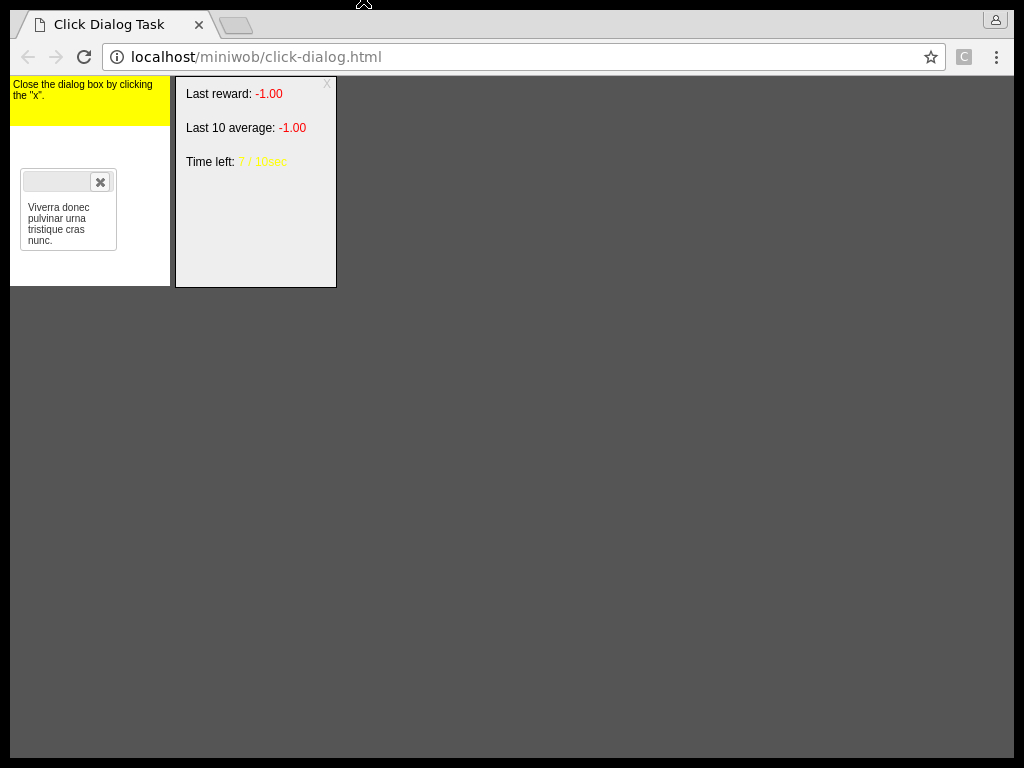

In [14]:
im = Image.fromarray(obs[0]['vision'])
im

### Image cropper

As you can see, image is not cropped which is not very convenient, as relevant part of the problem's field is just tiny portion of the field. Below is the wrapper we'll use to crop the observations

In [0]:
class MiniWoBCropper(vectorized.ObservationWrapper):
    """
    Crops the WoB area and converts the observation into PyTorch (C, H, W) format.
    """
    # Area of interest
    WIDTH = 160
    HEIGHT = 210
    X_OFS = 10
    Y_OFS = 75
    
    def __init__(self, env, keep_text=False):
        super(MiniWoBCropper, self).__init__(env)
        self.keep_text = keep_text
        img_space = gym.spaces.Box(low=0, high=255, shape=(3, self.HEIGHT, self.WIDTH))
        if keep_text:
            self.observation_space = gym.spaces.Tuple(spaces=(img_space, gym.spaces.Space))
        else:
            self.observation_space = img_space

    def _observation(self, observation_n):
        res = []
        for obs in observation_n:
            if obs is None:
                res.append(obs)
                continue
            img = obs['vision'][self.Y_OFS:self.Y_OFS+self.HEIGHT, self.X_OFS:self.X_OFS+self.WIDTH, :]
            img = np.transpose(img, (2, 0, 1))
            if self.keep_text:
                text = " ".join(map(lambda d: d.get('instruction', ''), obs.get('text', [{}])))
                res.append((img, text))
            else:
                res.append(img)
        return res


Tiny easter egg in MiniWoB: image area has exactly the same dimension as Atari games resultion in ALE.

And please note that old gym doesn't support `dtype` in `Box` class, so, it will be wrongly set as float32 (but, in fact, byte)

In [16]:
env = make_env(wrapper_func = lambda env: MiniWoBCropper(env))
obs = join_env(env)
obs

[2019-07-10 10:58:47,136] Making new env: wob.mini.ClickDialog-v0
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
[2019-07-10 10:58:47,151] Using the golang VNC implementation
[2019-07-10 10:58:47,158] Using VNCSession arguments: {'encoding': 'tight', 'compress_level': 0, 'fine_quality_level': 100, 'subsample_level': 0, 'start_timeout': 7}. (Customize by running "env.configure(vnc_kwargs={...})"
[2019-07-10 10:58:47,168] [0] Connecting to environment: vnc://193.49.213.5:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a convenient in-browser VNC client: http://193.49.213.5:15900/viewer/?password=openai


Remotes URL: vnc://193.49.213.5:5900+15900


[2019-07-10 10:59:07,469] [0:193.49.213.5:5900] ntpdate -q -p 8 193.49.213.5 call timed out after 20.0s; killing the subprocess. This is ok, but you could have more accurate timings by enabling UDP port 123 traffic to your env. (Alternatively, you can try increasing the timeout by setting environment variable UNIVERSE_NTPDATE_TIMEOUT=10.)
[2019-07-10 10:59:10,300] [0:193.49.213.5:5900] Sending reset for env_id=wob.mini.ClickDialog-v0 fps=60 episode_id=0
[2019-07-10 10:59:10,530] [0:193.49.213.5:5900] Initial reset complete: episode_id=14973


[array([[[181, 182, 182, ..., 182, 182, 182],
         [255, 255, 255, ..., 255, 255, 255],
         [254, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]],
 
        [[179, 180, 180, ..., 180, 180, 180],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]],
 
        [[182, 183, 183, ..., 183, 183, 183],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)]

In [17]:
obs[0].shape

(3, 210, 160)

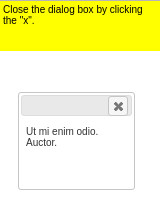

In [18]:
im = Image.fromarray(obs[0].transpose((1, 2, 0)))
im

### Action space

VNCActionSpace can include mouse click and key press events. To demonstrate how it is done, let's solve environment above by using brute force agent (sometimes this approach works better than sophisticated RL methods!)

In [19]:
env.reset()
join_env(env);

[2019-07-10 10:59:23,873] [0:193.49.213.5:5900] Sending reset for env_id=wob.mini.ClickDialog-v0 fps=60 episode_id=0
[2019-07-10 10:59:23,877] [0:193.49.213.5:5900] Sending reset for env_id=wob.mini.ClickDialog-v0 fps=60 episode_id=0


In [20]:
# try to solve 10 episodes by doing random clicking
rewards = []
clicks_done = 0
cur_reward = 0

while len(rewards) < 10:
    clicks_done += 1
    click_x = MiniWoBCropper.X_OFS + np.random.randint(MiniWoBCropper.WIDTH)
    click_y = MiniWoBCropper.Y_OFS + np.random.randint(MiniWoBCropper.HEIGHT)

    acts = [
        universe.spaces.PointerEvent(click_x, click_y, buttonmask=0),
        universe.spaces.PointerEvent(click_x, click_y, buttonmask=1),
        universe.spaces.PointerEvent(click_x, click_y, buttonmask=0)
    ]

    obs_n, r_n, end_n, _ = env.step([acts])
    cur_reward += r_n[0]
    if end_n[0]:
        rewards.append(cur_reward)
        print("Got reward %.3f, clicks done %d" % (cur_reward, clicks_done))
        clicks_done = 0
        cur_reward = 0
        
print("Mean reward for %d solved episodes is %.3f" % (len(rewards), np.mean(rewards)))

[2019-07-10 10:59:28,967] Throttle fell behind by 4.49s; lost 22.47 frames


Got reward -1.000, clicks done 17
Got reward -1.000, clicks done 53
Got reward 0.713, clicks done 17
Got reward 0.329, clicks done 36
Got reward 0.046, clicks done 50
Got reward -1.000, clicks done 52
Got reward -1.000, clicks done 52
Got reward 0.483, clicks done 29
Got reward 0.388, clicks done 33
Got reward 0.831, clicks done 11
Mean reward for 10 solved episodes is -0.121


Above approach are sampling from $160*210 = 33600$ action space, which might be too much for RL methods. To simplify our life a bit, we can discretize the area to be clicked by applying some grid and allowing to click only in the center of grid cell.

<img src="https://raw.githubusercontent.com/Shmuma/rlss2019-hands-on/miniwob/labs/MiniWoB/images/wob-actions.png" alt="Drawing" style="width: 500px;"/>

Universe already comes with such preprocessor, called `SoftmaxClickMouse`: https://github.com/openai/universe/blob/master/universe/wrappers/experimental/action_space.py#L65, let's try it in our random clicking approach

In [21]:
env = make_env(wrapper_func = lambda env: SoftmaxClickMouse(MiniWoBCropper(env)))
join_env(env);

[2019-07-10 11:00:47,287] Making new env: wob.mini.ClickDialog-v0
/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
[2019-07-10 11:00:47,302] Using SoftmaxClickMouse with action_region=(10, 125, 170, 285), noclick_regions=[]
[2019-07-10 11:00:47,310] SoftmaxClickMouse noclick regions removed 0 of 256 actions
[2019-07-10 11:00:47,312] Using the golang VNC implementation
[2019-07-10 11:00:47,315] Using VNCSession arguments: {'encoding': 'tight', 'compress_level': 0, 'fine_quality_level': 100, 'subsample_level': 0, 'start_timeout': 7}. (Customize by running "env.configure(vnc_kwargs={...})"
[2019-07-10 11:00:47,325] [0] Connecting to environment: vnc://193.49.213.5:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a convenient in-browser VNC client: http://193.49.21

Remotes URL: vnc://193.49.213.5:5900+15900


[2019-07-10 11:01:07,629] [0:193.49.213.5:5900] ntpdate -q -p 8 193.49.213.5 call timed out after 20.0s; killing the subprocess. This is ok, but you could have more accurate timings by enabling UDP port 123 traffic to your env. (Alternatively, you can try increasing the timeout by setting environment variable UNIVERSE_NTPDATE_TIMEOUT=10.)
[2019-07-10 11:01:10,470] [0:193.49.213.5:5900] Sending reset for env_id=wob.mini.ClickDialog-v0 fps=60 episode_id=0
[2019-07-10 11:01:10,737] [0:193.49.213.5:5900] Initial reset complete: episode_id=14991


In [22]:
env.action_space

Discrete(256)

In [23]:
# try to solve 10 episodes by doing random clicking
rewards = []
clicks_done = 0
cur_reward = 0

while len(rewards) < 10:
    clicks_done += 1
    click_x = MiniWoBCropper.X_OFS + np.random.randint(MiniWoBCropper.WIDTH)
    click_y = MiniWoBCropper.Y_OFS + np.random.randint(MiniWoBCropper.HEIGHT)

    obs_n, r_n, end_n, _ = env.step([env.action_space.sample()])
    cur_reward += r_n[0]
    if end_n[0]:
        rewards.append(cur_reward)
        print("Got reward %.3f, clicks done %d" % (cur_reward, clicks_done))
        clicks_done = 0
        cur_reward = 0
        
print("Mean reward for %d solved episodes is %.3f" % (len(rewards), np.mean(rewards)))

Got reward -1.000, clicks done 52
Got reward 0.240, clicks done 39
Got reward -1.000, clicks done 53
Got reward 0.657, clicks done 20
Got reward -1.000, clicks done 52
Got reward 0.556, clicks done 25
Got reward -1.000, clicks done 52
Got reward -1.000, clicks done 52
Got reward 0.139, clicks done 46
Got reward 0.529, clicks done 26
Mean reward for 10 solved episodes is -0.288


Ok, meh. Let's try to apply our shiny RL tools.